In [111]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import ast 
from utils import *
import matplotlib.dates as mdates
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import Normalize, LogNorm

In [16]:
intensities_filtr_path = '../data/intensities_filtered_stg7.csv'
intensities_unfiltr_path = '../data/stg7_intensities.csv'
wavelengths_path = '../data/wavelengths.npy'

In [17]:
intensities_filtr = pd.read_csv(intensities_filtr_path)
intensities_unfiltr = pd.read_csv(intensities_unfiltr_path)
wavelengths = np.load(wavelengths_path)

In [4]:
intensities_filtr['Intensities'] = intensities_filtr['Intensities'].apply(lambda x: eval(x) if isinstance(x, str) else x)

In [18]:
intensities_unfiltr['Intensities'] = intensities_unfiltr['Intensities'].apply(lambda x: eval(x) if isinstance(x, str) else x)

In [20]:
intensities_unfiltr.head()

Time  \
0  2024-12-02 07:59:59.061744213   
1  2024-12-02 08:00:00.166635990   
2  2024-12-02 08:00:01.218027115   
3  2024-12-02 08:00:02.222875118   
4  2024-12-02 08:00:03.228739262   

                                         Intensities Severity    Status  
0  (4.77, -1.31, -2.98, 3.81, 7.17, -6.02, 3.74, ...     NONE  NO_ALARM  
1  (-4.23, -5.31, 2.02, 4.81, 3.17, -6.02, 5.74, ...     NONE  NO_ALARM  
2  (2.77, 2.69, -2.98, 1.81, 6.17, 1.98, 5.74, 0....     NONE  NO_ALARM  
3  (-1.23, -3.31, -1.98, 9.81, 8.17, -4.02, 5.74,...     NONE  NO_ALARM  
4  (1.77, -2.31, -0.98, 5.81, 7.17, -5.02, 5.74, ...     NONE  NO_ALARM

In [ ]:
def plot_3d_spectrogram_time_filtered(df, 
                        start_time, 
                        end_time, 
                        wavelengths,
                        time_col='Time', 
                        intensities_col='Intensities'
                       ):
    """
    Creates a 3D spectrogram for a specific time range from the DataFrame.
    
    Parameters:
    - df (pd.DataFrame): DataFrame containing 'Time' and 'Intensities' columns.
    - start_time (str or pd.Timestamp): Start of the time range.
    - end_time (str or pd.Timestamp): End of the time range.
    - wavelengths (np.array): NumPy array containing wavelength values.
    
    Returns:
    - None: Displays the 3D spectrogram plot.
    """
    df[time_col] = pd.to_datetime(df[time_col])
    
    # Filter DataFrame based on the specified time range
    filtered_df = df[(df[time_col] >= pd.to_datetime(start_time)) & 
                     (df[time_col] <= pd.to_datetime(end_time))]
    
    if filtered_df.empty:
        print(f"No data found in the time range: {start_time} to {end_time}")
        return
    
    times = pd.to_datetime(filtered_df[time_col])
    intensities = np.array([intensity for intensity in filtered_df[intensities_col]])
    
    times_mpl = mdates.date2num(times)

    # Create meshgrid for 3D plotting
    T, W = np.meshgrid(times_mpl, wavelengths)
    
    # Create figure
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(ax.view_init(azim=0, elev=45))

    # Plot surface
    surf = ax.plot_surface(W, T, intensities.T, cmap='viridis', shade=True)

    # Format title with the required format
    start_datetime = pd.to_datetime(start_time)
    end_datetime = pd.to_datetime(end_time)
    title_str = f"Spectrum on {start_datetime.strftime('%d.%m.%Y')} from {start_datetime.strftime('%H:%M')} to {end_datetime.strftime('%H:%M')}, number of datapoints: {len(filtered_df)}"

    # Set plot labels
    ax.set_xlabel("Wavelength (nm)")  
    ax.set_ylabel("Time", labelpad=15) 
    ax.set_zlabel("Intensity")
    ax.set_title(title_str)

    
    ax.yaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))

    ax.set_ylim(mdates.date2num(pd.to_datetime(start_time)), 
                mdates.date2num(pd.to_datetime(end_time)))

    time_ticks = pd.date_range(start=start_time, end=end_time, freq="60min")
    ax.set_yticks(mdates.date2num(time_ticks))

    # Add color bar for intensity scale
    fig.colorbar(surf, ax=ax, label="Intensity")

    plt.show()

In [ ]:
plot_3d_spectrogram_time_filtered(intensities_unfiltr, "2024-11-27 9:00:00", "2024-11-27 19:00:00", wavelengths)

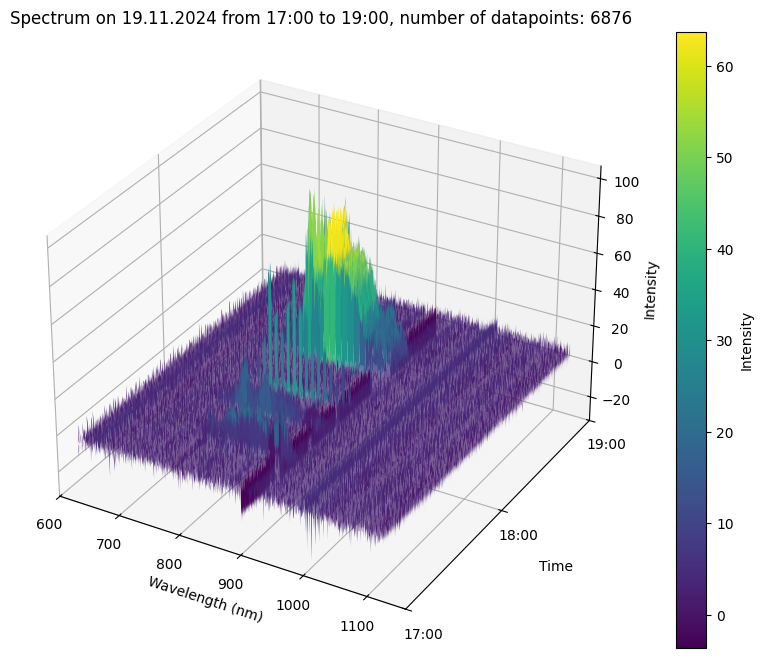

In [138]:
plot_3d_spectrogram_time_filtered(intensities_unfiltr, "2024-11-19 17:00:00", "2024-11-19 19:00:00", wavelengths)

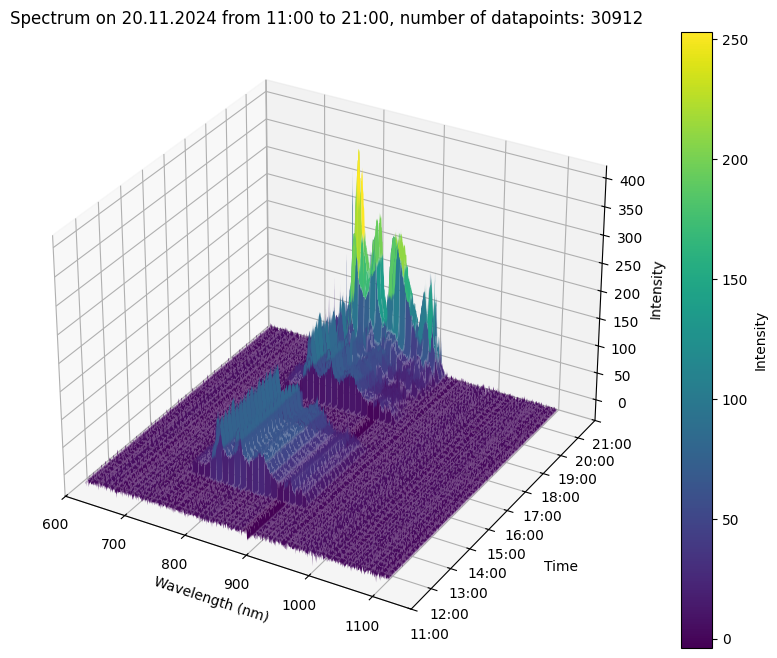

In [140]:
plot_3d_spectrogram_time_filtered(intensities_unfiltr, "2024-11-20 11:00:00", "2024-11-20 21:00:00", wavelengths)

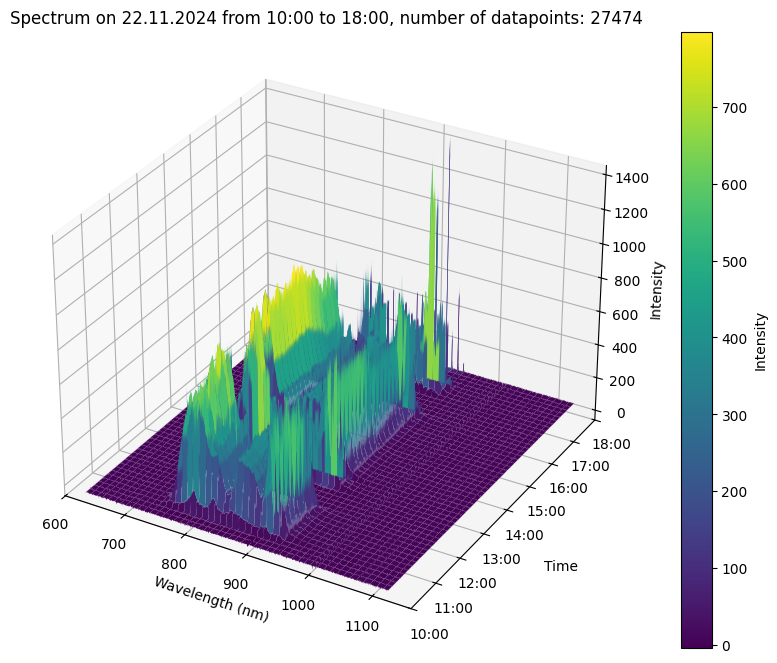

In [147]:
plot_3d_spectrogram_time_filtered(intensities_unfiltr, "2024-11-22 10:00:00", "2024-11-22 18:00:00", wavelengths)

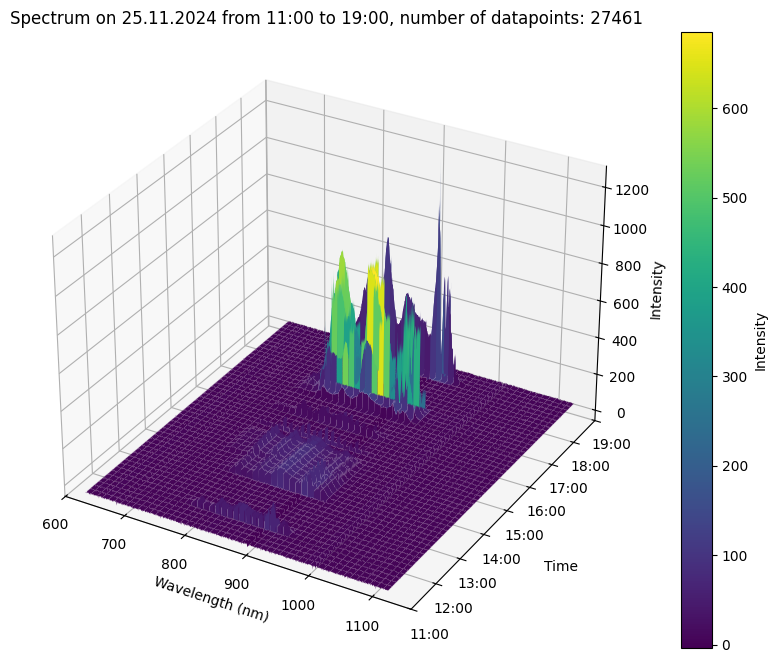

In [142]:
plot_3d_spectrogram_time_filtered(intensities_unfiltr, "2024-11-25 11:00:00", "2024-11-25 19:00:00", wavelengths)

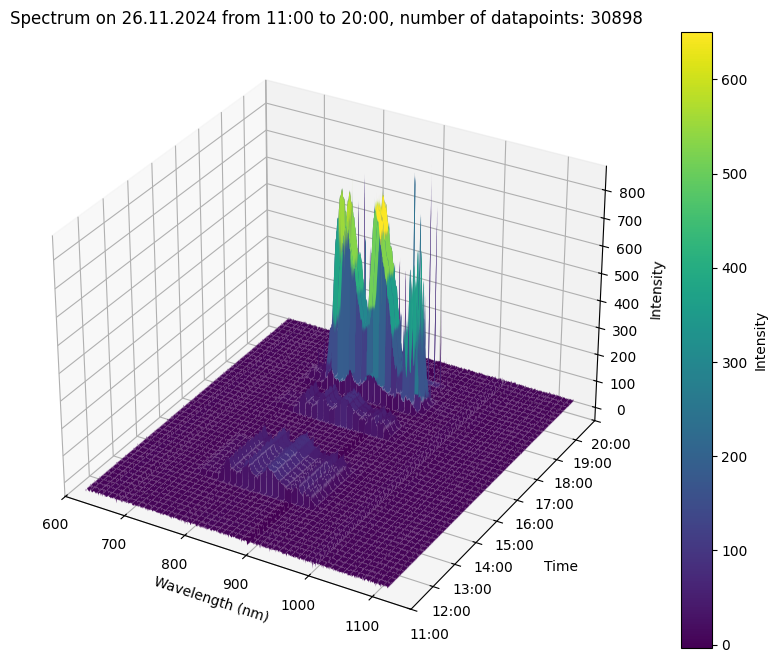

In [143]:
plot_3d_spectrogram_time_filtered(intensities_unfiltr, "2024-11-26 11:00:00", "2024-11-26 20:00:00", wavelengths)

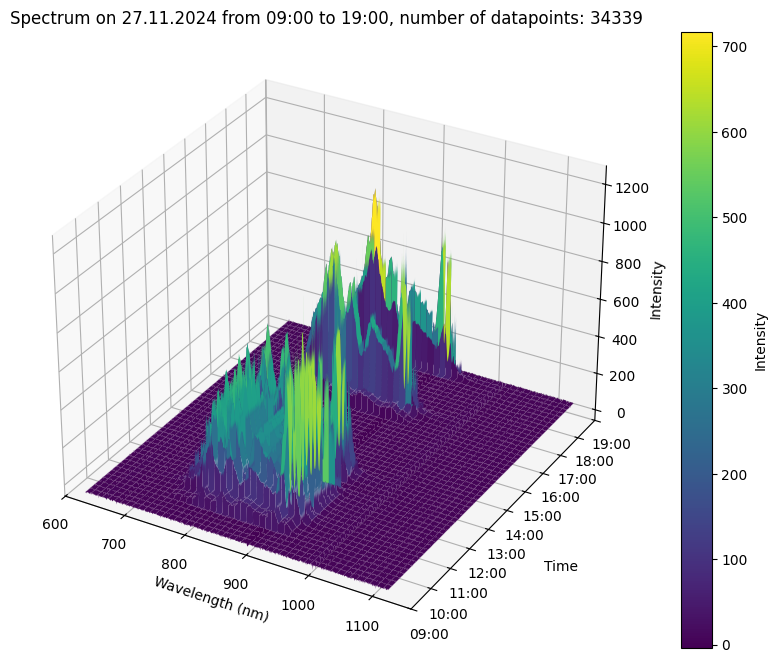

In [144]:
plot_3d_spectrogram_time_filtered(intensities_unfiltr, "2024-11-27 9:00:00", "2024-11-27 19:00:00", wavelengths)

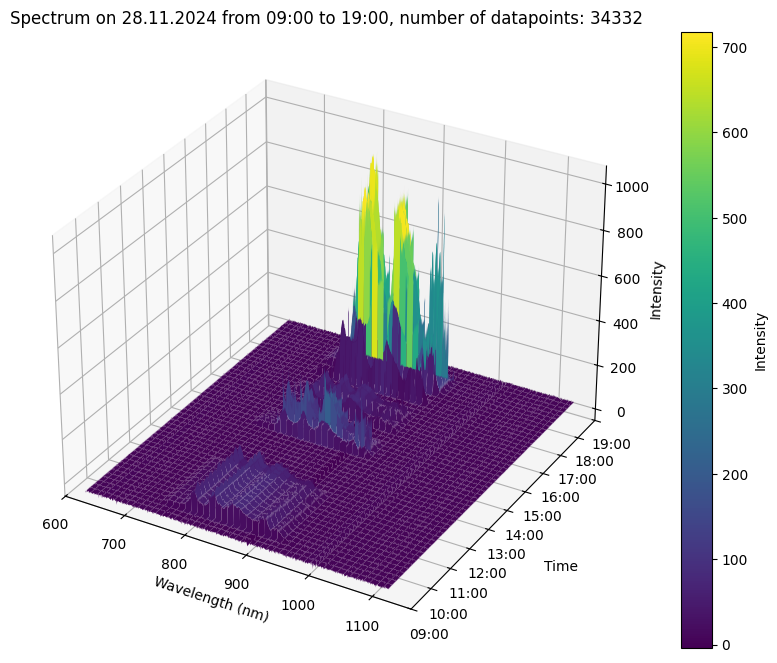

In [148]:
plot_3d_spectrogram_time_filtered(intensities_unfiltr, "2024-11-28 9:00:00", "2024-11-28 19:00:00", wavelengths)

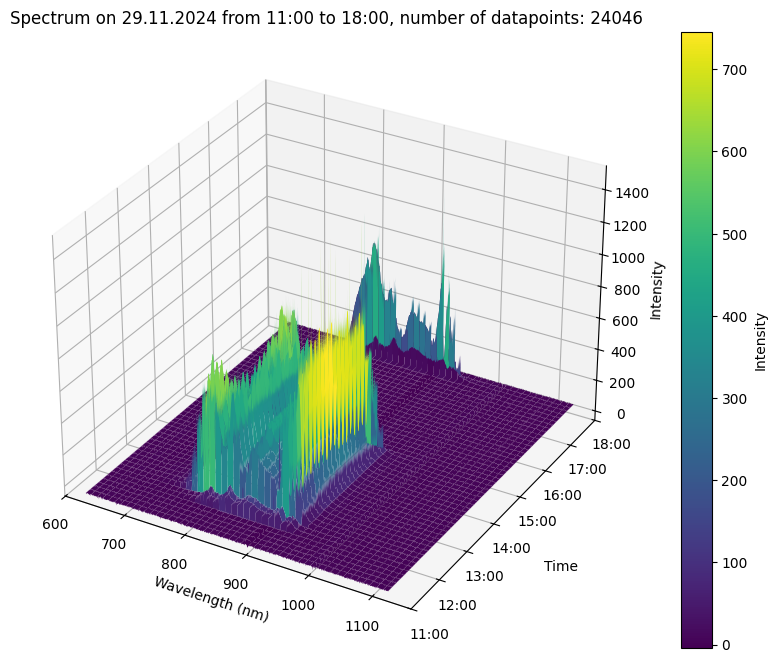

In [149]:
plot_3d_spectrogram_time_filtered(intensities_unfiltr, "2024-11-29 11:00:00", "2024-11-29 18:00:00", wavelengths)

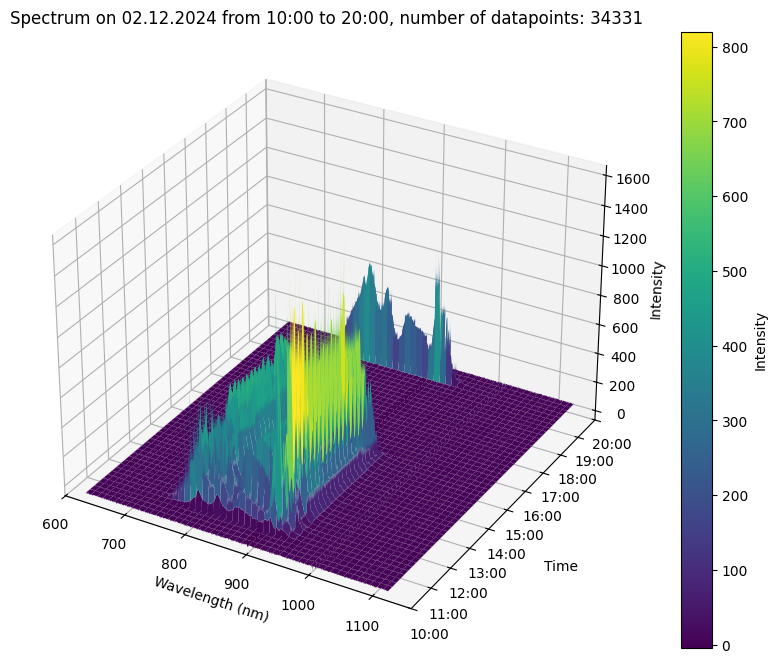

In [150]:
plot_3d_spectrogram_time_filtered(intensities_unfiltr, "2024-12-02 10:00:00", "2024-12-02 20:00:00", wavelengths)

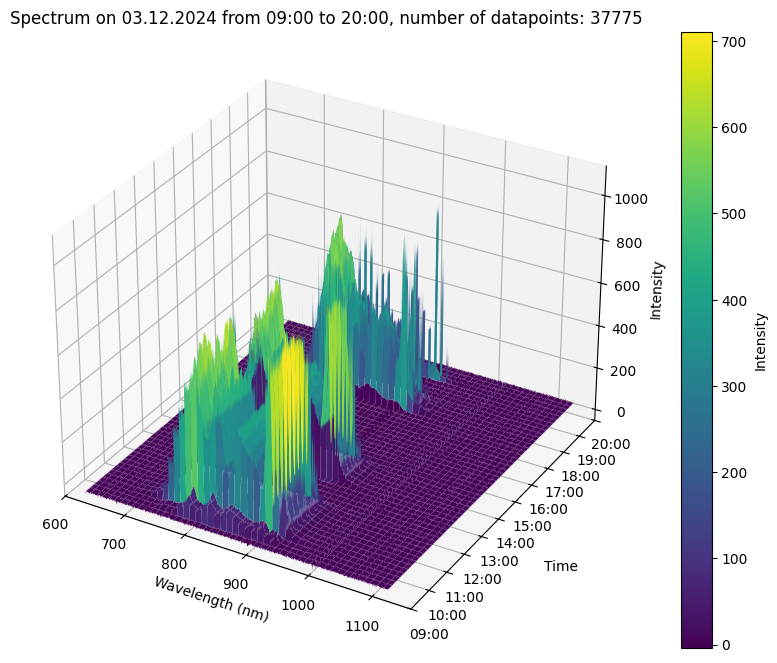

In [151]:
plot_3d_spectrogram_time_filtered(intensities_unfiltr, "2024-12-03 9:00:00", "2024-12-03 20:00:00", wavelengths)

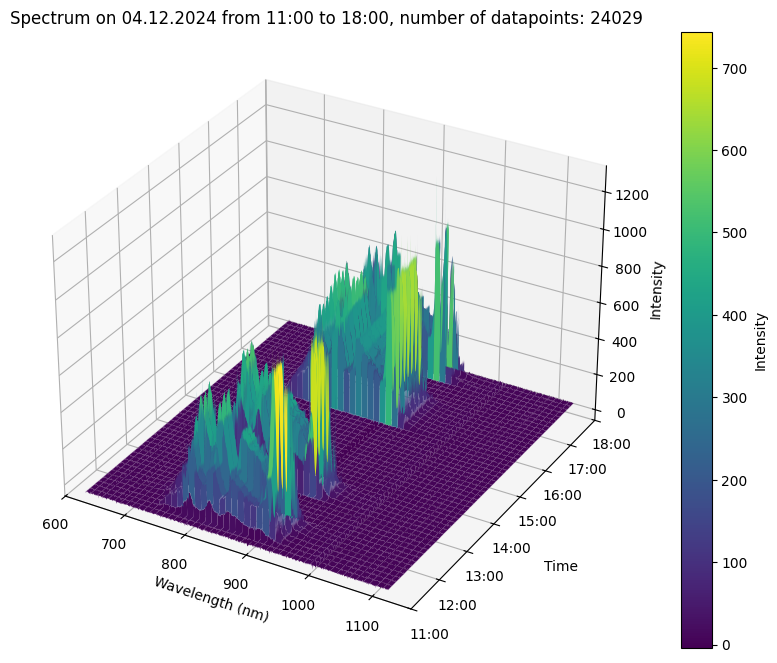

In [152]:
plot_3d_spectrogram_time_filtered(intensities_unfiltr, "2024-12-04 11:00:00", "2024-12-04 18:00:00", wavelengths)

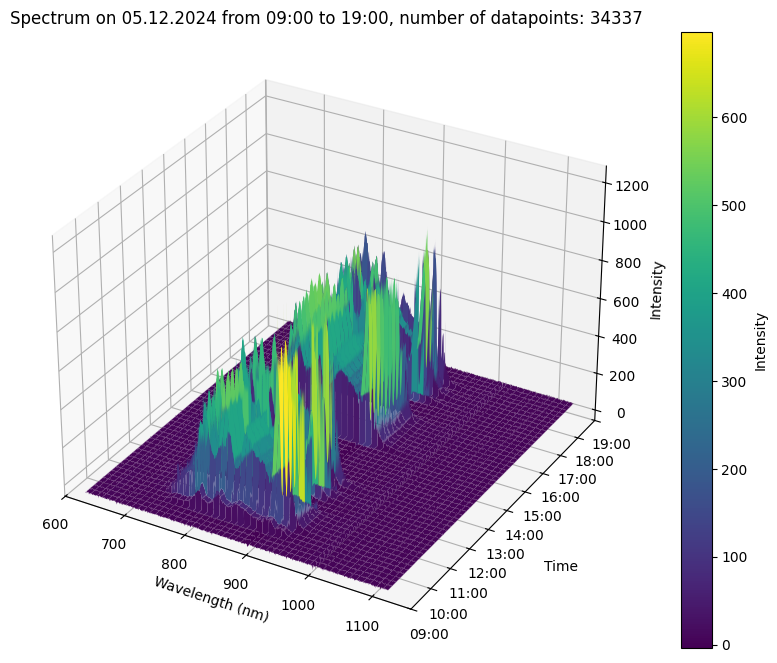

In [153]:
plot_3d_spectrogram_time_filtered(intensities_unfiltr, "2024-12-05 9:00:00", "2024-12-05 19:00:00", wavelengths)

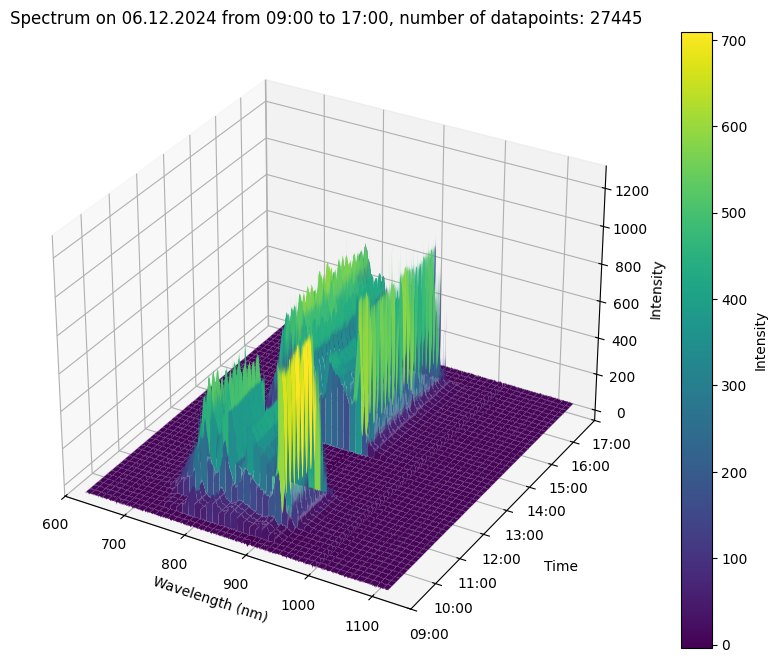

In [154]:
plot_3d_spectrogram_time_filtered(intensities_unfiltr, "2024-12-06 9:00:00", "2024-12-06 17:00:00", wavelengths)

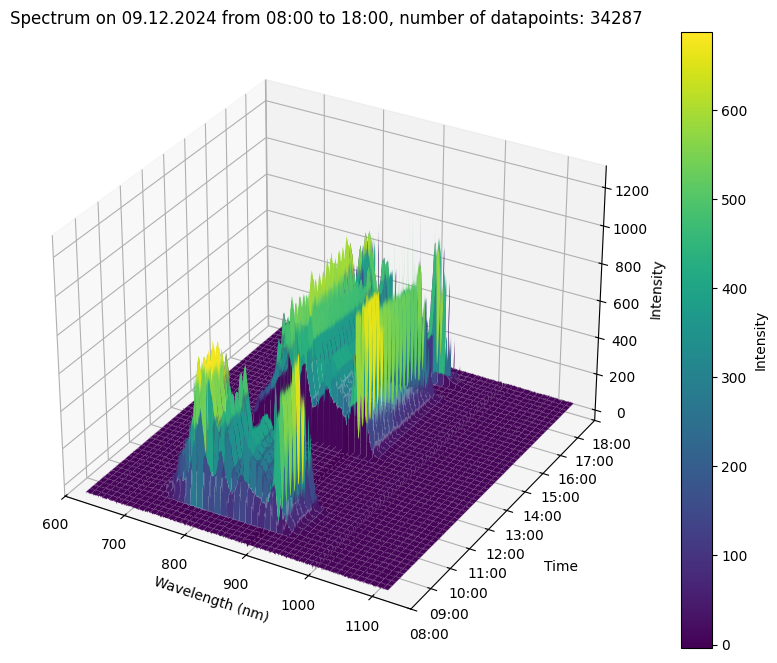

In [155]:
plot_3d_spectrogram_time_filtered(intensities_unfiltr, "2024-12-09 8:00:00", "2024-12-09 18:00:00", wavelengths)

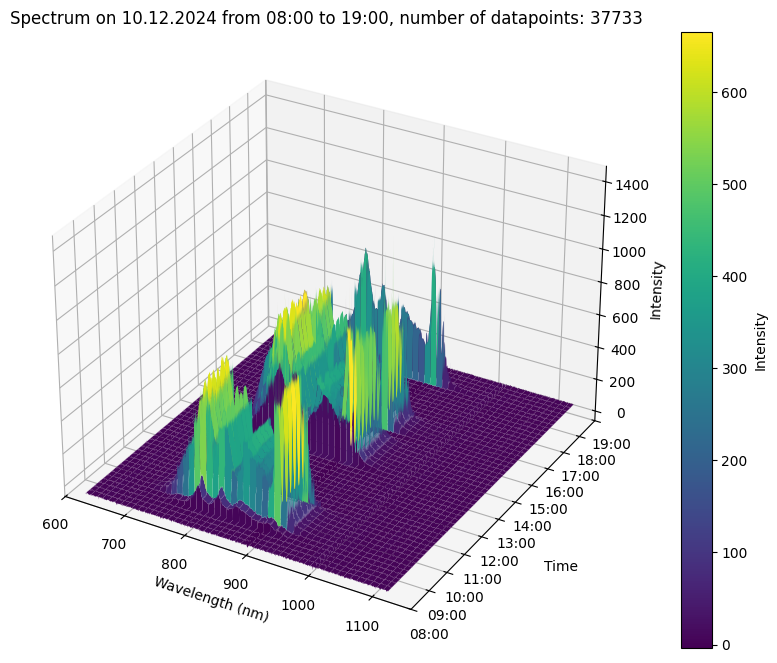

In [156]:
plot_3d_spectrogram_time_filtered(intensities_unfiltr, "2024-12-10 8:00:00", "2024-12-10 19:00:00", wavelengths)

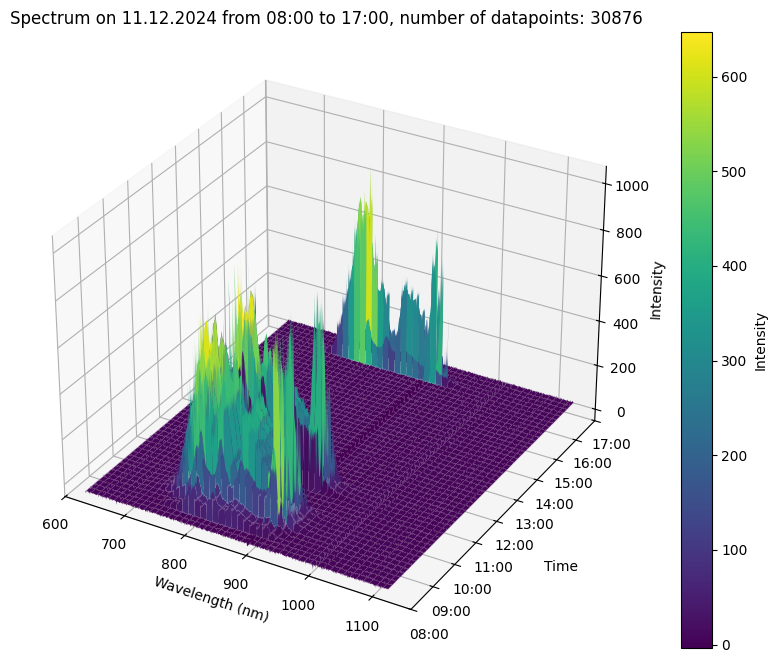

In [157]:
plot_3d_spectrogram_time_filtered(intensities_unfiltr, "2024-12-11 8:00:00", "2024-12-11 17:00:00", wavelengths)